In [93]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import numpy as np
import joblib
import imodelsx.process_results
import sys
from sklearn.metrics import accuracy_score

sys.path.append('../experiments/')
results = []

results_dir = f'../results/distillation_cub/cub'
experiment_filename = '../experiments/distillation_cub.py'

# load the results in to a pandas dataframe
r = imodelsx.process_results.get_results_df(results_dir)
cols_varied = imodelsx.process_results.get_experiment_keys(
    r, experiment_filename)
print('experiment varied these params:', cols_varied)
r = imodelsx.process_results.fill_missing_args_with_default(
    r, experiment_filename)

# save results as csvs for backup
r.to_csv('../csv_results/distillation_cub.csv')

# get the breakdown of data in these groups
r.groupby(cols_varied).size()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 143.20it/s]


TypeError: unhashable type: 'list'

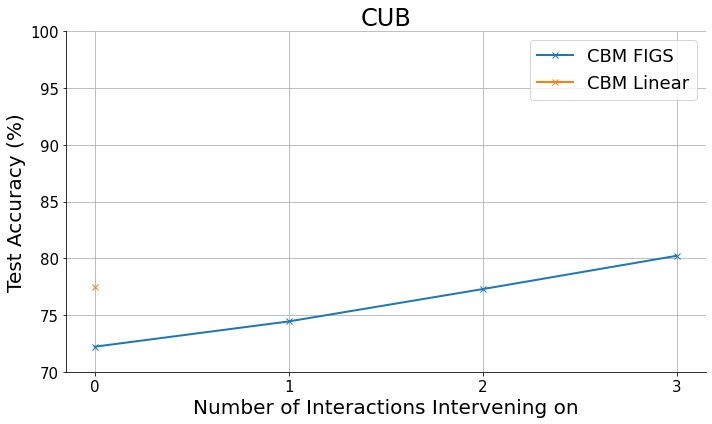

In [94]:
linear = r.iloc[1, :] #TODO: make sure this is linear experiment
num_iters = linear.num_interactions_intervention if linear.num_interactions_intervention != 0 else linear.n_trees
linear_plotting = [['teacher_prediction_test_accuracy']+
            [f'teacher_pred_lin_interv_iter{i}_test_accuracy' for i in range(num_iters)]]
figs_plotting = [['student_prediction_test_accuracy']+
                [f'student_pred_adap_interv_iter{i}_test_accuracy' for i in range(num_iters)]]

t_l_pred = linear[linear_plotting[0]].to_numpy()
s_a_pred = linear[figs_plotting[0]].to_numpy()

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.titlesize'] = 24
# Define x-axis range
x = np.arange(0, num_iters+1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, np.array(s_a_pred)*100, label='CBM FIGS', linewidth=2, marker='x')
plt.plot(x, np.array(t_l_pred)*100, label='CBM Linear', linewidth=2, marker='x')
plt.xticks(x)
# Labels and legend
plt.xlabel("Number of Interactions Intervening on", fontsize = 20)
plt.ylim(70, 100)
plt.ylabel("Test Accuracy (%)", fontsize = 20)
plt.title("CUB")
plt.legend(fontsize = 18)
plt.grid(True)

# Show the plot
#plt.savefig('/home/mattyshen/DistillationEdit/figures/tti/CUB_aTTI_Effect.png', bbox_inches='tight')

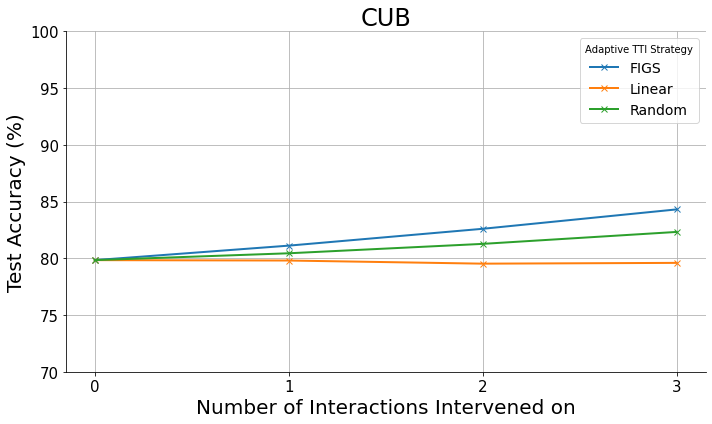

In [95]:
plt.rcParams['axes.titlesize'] = 24
# Define x-axis range
linear = r.iloc[1, :] #TODO: make sure this is linear experiment

num_iters = linear.num_interactions_intervention if linear.num_interactions_intervention != 0 else linear.n_trees
t_l_pred = [['teacher_prediction_test_accuracy']+
            [f'teacher_pred_lin_interv_iter{i}_test_accuracy' for i in range(num_iters)]]
t_a_pred = [['teacher_prediction_test_accuracy']+
                [f'teacher_pred_adap_interv_iter{i}_test_accuracy' for i in range(num_iters)]]
t_r_pred = [['teacher_prediction_test_accuracy']+
                [f'teacher_pred_rand_interv_iter{i}_test_accuracy' for i in range(num_iters)]]

t_l_pred = linear[t_l_pred[0]].to_numpy()
t_a_pred = linear[t_a_pred[0]].to_numpy()
t_r_pred = linear[t_r_pred[0]].to_numpy()


x = np.arange(0, num_iters+1)
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, np.array(t_a_pred)*100, label='FIGS', linewidth=2, marker='x')
plt.plot(x, np.array(t_l_pred)*100, label='Linear', linewidth=2, marker='x')
plt.plot(x, np.array(t_r_pred)*100, label='Random', linewidth=2, marker='x')
plt.xticks(x)
# Labels and legend
plt.xlabel("Number of Interactions Intervened on", fontsize = 20)
plt.ylim(70, 100)
plt.ylabel("Test Accuracy (%)", fontsize = 20)
plt.title("CUB")
plt.legend(title='Adaptive TTI Strategy', fontsize = 14)
plt.grid(True)

# Show the plot
#plt.savefig('/home/mattyshen/DistillationEdit/figures/tti/CUB_aTTI_Effect_Diff.png', bbox_inches='tight')